In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Url containing the table we want to collect
url = 'https://en.wikipedia.org/wiki/List_of_metro_systems'
# List of 20 cities Amazon is consider
top_20 = ['Atlanta', 'Austin', 'Boston', 'Chicago', 'Columbus', 'Dallas', 'Denver', 'Indianapolis', 'Los Angeles', 'Miami', 'Montgomery County', 'Nashville', 'Newark', 'New York', 'Northern Virginia', 'Philadelphia', 'Pittsburgh', 'Raleigh', 'Toronto', 'Washington']

In [3]:
# Collect the tables on the webpage
tables = pd.read_html(url, header=0, flavor='html5lib')
len(tables)

3

In [4]:
df = tables[0]

In [5]:
df.head()

,City,Country,Name,Yearopened,Year of lastexpansion,Stations,System length,Annual ridership(millions)
0,Algiers,Algeria,Algiers Metro,2011[11],2018[12],19[12],18.5 km (11.5 mi)[13],30 (2017)[R 1]
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2018[Nb 1][14],87[14],54.7 km (34.0 mi)[14],317.7 (2017)[R 2]
2,Yerevan,Armenia,Yerevan Metro,1981[15],1996[16],10[15],13.4 km (8.3 mi)[15],16.2 (2017)[R 3]
3,Vienna,Austria,Vienna U-Bahn,1976[17][Nb 2],2017[18],98[19],83.3 km (51.8 mi)[17],453.6 (2017)[R 4]
4,Baku,Azerbaijan,Baku Metro,1967[20],2016[Nb 3],25[20],36.7 km (22.8 mi)[20],228.8 (2017)[R 3]


In [6]:
df.loc[174:176]

,City,Country,Name,Yearopened,Year of lastexpansion,Stations,System length,Annual ridership(millions)
174,Staten Island Railway,1925[Nb 78],2017[318],21[315][319],22.5 km (14.0 mi)[317],8.8 (2017)[R 14][R Nb 1],NaN,NaN
175,PATH,1908[320],1937[Nb 79],13[321],22.2 km (13.8 mi)[322],93.0 (2017)[R 14][R Nb 1],NaN,NaN
176,Philadelphia,United States,SEPTA[323][Nb 80],1907,1973,75[323],59.1 km (36.7 mi)[324][325],91.8 (2017)[R 14][R Nb 1]


In [7]:
# PATCO, Staten island subway and PATH trains were missing City and Country columns and shifted left two columns
# This is likely due to merged cells in the Wikipedia table
# Here we correct that with .shift() and row information assignment

# # First Philly - This was no longer needed since the Wikipedia page was fixed
# df.loc[176] = df.loc[176].shift(2)
# df.loc[176, ['City','Country']] = ['Philadelphia','United States']

# Now NY
df.loc[174:175] = df.loc[174:175].shift(2, axis=1)
df.loc[174:175, ['City','Country']] = ['New York City','United States']
df.loc[174:176]

,City,Country,Name,Yearopened,Year of lastexpansion,Stations,System length,Annual ridership(millions)
174,New York City,United States,Staten Island Railway,1925[Nb 78],2017[318],21[315][319],22.5 km (14.0 mi)[317],8.8 (2017)[R 14][R Nb 1]
175,New York City,United States,PATH,1908[320],1937[Nb 79],13[321],22.2 km (13.8 mi)[322],93.0 (2017)[R 14][R Nb 1]
176,Philadelphia,United States,SEPTA[323][Nb 80],1907,1973,75[323],59.1 km (36.7 mi)[324][325],91.8 (2017)[R 14][R Nb 1]


In [8]:
# Filter by country = US
df = df[(df['Country'] == 'United States') | (df['City'] == 'Toronto')]

In [9]:
# Make sure we have 15 rows, like the Wikipedia table
df.shape

(15, 8)

In [10]:
# All U.S. Cities and Toronto
df.head()

,City,Country,Name,Yearopened,Year of lastexpansion,Stations,System length,Annual ridership(millions)
16,Toronto,Canada,Toronto subway[45],1954[46],2017[46],75[47],76.9 km (47.8 mi)[48][49],304.1 (2017)[R 14][R Nb 1][R Nb 2]
166,Atlanta,United States,MARTA,1979[301],2000[301],38[302],76.6 km (47.6 mi)[302],67.4 (2017)[R 14][R Nb 1]
167,Baltimore,United States,Baltimore Metro Subway,1983,1995,14[303],24.9 km (15.5 mi)[303],10.8 (2017)[R 14][R Nb 1]
168,Boston,United States,MBTA Subway[Nb 69],1901[304][Nb 70],2014[305],51[306],61 km (38 mi)[306],167.2 (2017)[R 14][R Nb 1]
169,Chicago,United States,"Chicago ""L""",1897[307][Nb 71],2015[308][Nb 72],145[309],165.4 km (102.8 mi)[309][Nb 73],230.2 (2017)[R 14][R Nb 1]


In [11]:
# Only include cities that are in our list of 20 cities
df_20 = df[df['City'].str.contains(('|').join(top_20))]

In [12]:
# Reset the index and display our df
df_20.reset_index(drop=True, inplace=True)

In [13]:
# Let's rename some columns for clarity
df_20 = df_20.rename(columns={'Yearopened':'Year Opened',
                              'Year of lastexpansion': "Year of last Expansion",
                             'Annual ridership(millions)':'Annual Ridership (millions)',
                             'System length': 'System Length (km)'})

In [14]:
df_20.head()

,City,Country,Name,Year Opened,Year of last Expansion,Stations,System Length (km),Annual Ridership (millions)
0,Toronto,Canada,Toronto subway[45],1954[46],2017[46],75[47],76.9 km (47.8 mi)[48][49],304.1 (2017)[R 14][R Nb 1][R Nb 2]
1,Atlanta,United States,MARTA,1979[301],2000[301],38[302],76.6 km (47.6 mi)[302],67.4 (2017)[R 14][R Nb 1]
2,Boston,United States,MBTA Subway[Nb 69],1901[304][Nb 70],2014[305],51[306],61 km (38 mi)[306],167.2 (2017)[R 14][R Nb 1]
3,Chicago,United States,"Chicago ""L""",1897[307][Nb 71],2015[308][Nb 72],145[309],165.4 km (102.8 mi)[309][Nb 73],230.2 (2017)[R 14][R Nb 1]
4,Los Angeles,United States,Metro Rail[Nb 74],1993[312],2000[312][Nb 75],16[312][Nb 74],28.0 km (17.4 mi)[312],44.9 (2017)[R 14][R Nb 1][R Nb 22]


In [15]:
df_20

,City,Country,Name,Year Opened,Year of last Expansion,Stations,System Length (km),Annual Ridership (millions)
0,Toronto,Canada,Toronto subway[45],1954[46],2017[46],75[47],76.9 km (47.8 mi)[48][49],304.1 (2017)[R 14][R Nb 1][R Nb 2]
1,Atlanta,United States,MARTA,1979[301],2000[301],38[302],76.6 km (47.6 mi)[302],67.4 (2017)[R 14][R Nb 1]
2,Boston,United States,MBTA Subway[Nb 69],1901[304][Nb 70],2014[305],51[306],61 km (38 mi)[306],167.2 (2017)[R 14][R Nb 1]
3,Chicago,United States,"Chicago ""L""",1897[307][Nb 71],2015[308][Nb 72],145[309],165.4 km (102.8 mi)[309][Nb 73],230.2 (2017)[R 14][R Nb 1]
4,Los Angeles,United States,Metro Rail[Nb 74],1993[312],2000[312][Nb 75],16[312][Nb 74],28.0 km (17.4 mi)[312],44.9 (2017)[R 14][R Nb 1][R Nb 22]
5,Miami,United States,Metrorail,1984[313],2012,23[314],40.1 km (24.9 mi)[314],19.7 (2017)[R 14][R Nb 1]
6,New York City,United States,New York City Subway,1904[315][Nb 76],2017[316],424[Nb 77],380.2 km (236.2 mi)[317],1727.3 (2017)[R 93]
7,New York City,United States,Staten Island Railway,1925[Nb 78],2017[318],21[315][319],22.5 km (14.0 mi)[317],8.8 (2017)[R 14][R Nb 1]
8,New York City,United States,PATH,1908[320],1937[Nb 79],13[321],22.2 km (13.8 mi)[322],93.0 (2017)[R 14][R Nb 1]
9,Philadelphia,United States,SEPTA[323][Nb 80],1907,1973,75[323],59.1 km (36.7 mi)[324][325],91.8 (2017)[R 14][R Nb 1]


In [16]:
# Here we clean most of the columns using df_20.iterrows()
for index, row in df_20.iterrows():
    # Cleanup Year Opened
    temp_list = str(df_20.loc[index,'Year Opened']).split('[')
    df_20.loc[index, 'Year Opened'] = float(temp_list[0])
    # Cleanup Year of Last Expansion
    temp_list = str(df_20.loc[index,'Year of last Expansion']).split('[')
    df_20.loc[index, 'Year of last Expansion'] = int(temp_list[0])
    # Cleanup Stations Count
    temp_list = str(df_20.loc[index,'Stations']).split('[')
    df_20.loc[index, 'Stations'] = int(temp_list[0])
    # Cleanup System Length
    temp_list = str(df_20.loc[index,'System Length (km)']).split()
    df_20.loc[index, 'System Length (km)'] = float(temp_list[0])
    # Cleanup Annual Ridership
    temp_list = df_20.loc[index,'Annual Ridership (millions)'].split()
    df_20.loc[index, 'Annual Ridership (millions)'] = float(temp_list[0])
    # Cleanup Names
    temp_list = df_20.loc[index,'Name'].split('[')
    df_20.loc[index, 'Name'] = str(temp_list[0])
    

In [17]:
# At last! The cleaned dataframe
df_20

,City,Country,Name,Year Opened,Year of last Expansion,Stations,System Length (km),Annual Ridership (millions)
0,Toronto,Canada,Toronto subway,1954,2017,75,76.9,304.1
1,Atlanta,United States,MARTA,1979,2000,38,76.6,67.4
2,Boston,United States,MBTA Subway,1901,2014,51,61,167.2
3,Chicago,United States,"Chicago ""L""",1897,2015,145,165.4,230.2
4,Los Angeles,United States,Metro Rail,1993,2000,16,28,44.9
5,Miami,United States,Metrorail,1984,2012,23,40.1,19.7
6,New York City,United States,New York City Subway,1904,2017,424,380.2,1727.3
7,New York City,United States,Staten Island Railway,1925,2017,21,22.5,8.8
8,New York City,United States,PATH,1908,1937,13,22.2,93
9,Philadelphia,United States,SEPTA,1907,1973,75,59.1,91.8


## Exploratory Analysis
A note on ridership, as defined by the NYC MTA:

Subway ridership consists of all passengers (other than NYC Transit employees) who enter the subway system, including passengers who transfer from buses.  Ridership does not include passengers who exit the subway or passengers who transfer from other subway lines, with the exception of out-of-system transfers;

In [3]:
# Dependencies if you want to run this part of the nb independently
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# First let's save as a csv so we don't have any issues with Wikipedia later!
#df_20.to_csv('CSV/transit_cleaned.csv', index=False)

In [5]:
# Read in .csv (saved earlier)
df_20 = pd.read_csv('CSV/transit_cleaned.csv')

In [6]:
# First let's create a color map:
import seaborn as sns

# Create the color map based on the unique boro names using seaborn presets
color_labels = df_20['City'].unique()
rgb_values = sns.color_palette("husl", len(df_20['City'].unique()))
color_map = dict(zip(color_labels, rgb_values))

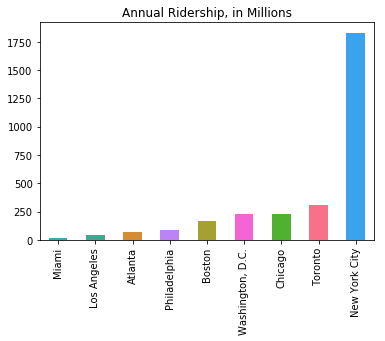

In [7]:
# A look at Annual ridership
to_plot = df_20.groupby('City')['Annual Ridership (millions)'].sum().sort_values()

# Plot now that we have sorted ascendingly
to_plot.plot.bar(title='Annual Ridership, in Millions', color=to_plot.index.map(color_map))
plt.xlabel(None)
plt.show()

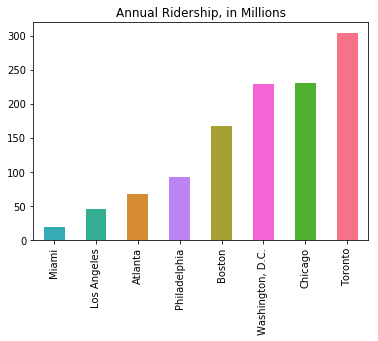

In [8]:
# Things are pretty skewed towards NYC, let's try without that city
no_ny = df_20[df_20['City'] != 'New York City']

# Summing ridership by city
to_plot = no_ny.groupby('City')['Annual Ridership (millions)'].sum().sort_values()

to_plot.plot.bar(title='Annual Ridership, in Millions', color=to_plot.index.map(color_map))
plt.xlabel(None)
plt.show()

# Chicago and D.C. look like have very active transit systems, great options, with Boston as a close third

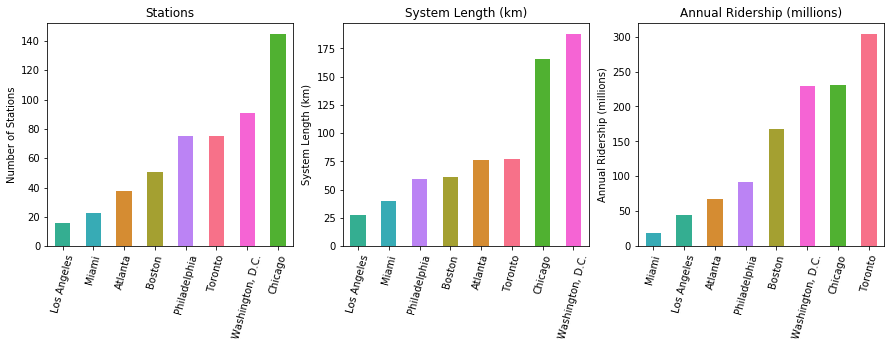

In [9]:
# Number of subplots
fig,axarr = plt.subplots(1,3)
# Columns to iterate for plotting
columns = ['Stations', 'System Length (km)','Annual Ridership (millions)']

# Plot
for col, ax in zip(columns, axarr):
    to_plot = no_ny.groupby('City')[col].sum().sort_values()
    to_plot.plot.bar(ax=ax, title=col, rot=75, figsize=(15,4), color=to_plot.index.map(color_map))

# Adding spacing for the plots to breathe
plt.subplots_adjust(top=0.9)

# Remove redundant xlabel
ylabels=['Number of Stations','System Length (km)','Annual Ridership (millions)']
for ax, label in zip(axarr, ylabels):
    ax.set_xlabel(None)
    ax.set_ylabel(label)

plt.savefig('Charts/summary_plots.png', bbox_inches='tight', dpi=300)
plt.show()

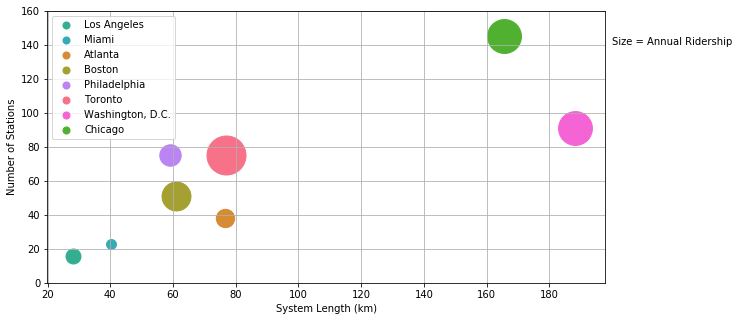

In [10]:
# Now let's summarize this data into one plot
to_plot = no_ny.groupby(['City'])['Stations','System Length (km)','Annual Ridership (millions)'].sum(). sort_values(by='Stations')

# Creating random colors for the different cities
colors = np.random.rand(to_plot.shape[0], 3)

# Initializing plot
fig, ax = plt.subplots(figsize=(10,5))

# Iterating over index and color list so we can create a legend with proper labels
for label in to_plot.index:
    plt.scatter(x=to_plot.loc[label, 'System Length (km)'],
               y=to_plot.loc[label, 'Stations'],
               s=to_plot.loc[label, 'Annual Ridership (millions)']*5,
               label=label,
               color=color_map[label])
# Adding labels
plt.xlabel('System Length (km)')
plt.ylabel('Number of Stations')
# Expanding the y-axis so we do not get any cutoff
plt.ylim(0,160)
# Adding gridlines
plt.grid()
# Making sure our legend dots are not all different sizes
lgnd = plt.legend(loc='best')
for dot in lgnd.legendHandles:
    dot._sizes = [50]

# Adding a label for size
plt.text(200, 140, 'Size = Annual Ridership')
# Saving the figure to the Charts folder    
plt.savefig('Charts/scatter_length_v_stations.png', bbox_inches='tight', dpi=300)

# log functionality if needed
# plt.yscale('log')
# plt.xscale('log')

plt.show()

# Looks like Chicago has the larger number of riders, but D.C's might have the most room to expand

In [31]:
# The overall look of the data!
df_20

,City,Country,Name,Year Opened,Year of last Expansion,Stations,System Length (km),Annual Ridership (millions)
0,Toronto,Canada,Toronto subway,1954.0,2017,75,76.9,304.1
1,Atlanta,United States,MARTA,1979.0,2000,38,76.6,67.4
2,Boston,United States,MBTA Subway,1901.0,2014,51,61.0,167.2
3,Chicago,United States,"Chicago ""L""",1897.0,2015,145,165.4,230.2
4,Los Angeles,United States,Metro Rail,1993.0,2000,16,28.0,44.9
5,Miami,United States,Metrorail,1984.0,2012,23,40.1,19.7
6,New York City,United States,New York City Subway,1904.0,2017,424,380.2,1727.3
7,New York City,United States,Staten Island Railway,1925.0,2017,21,22.5,8.8
8,New York City,United States,PATH,1908.0,1937,13,22.2,93.0
9,Philadelphia,United States,SEPTA,1907.0,1973,75,59.1,91.8
